<H1>Maquina de soporte vectorial<H1>

In [16]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dfTrain = pd.read_csv("train.csv")
dfTrain.shape
dfTrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
#obtenemos los posibles valores que puede tomar el rango de precio
dfTrain['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [19]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Se realiza una correlacion con la variable de interes para elegir las variables que mas influiran en el precio

In [20]:
corrTrain = dfTrain.corr()
print(corrTrain['price_range'].sort_values(ascending=False)[:8],'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
Name: price_range, dtype: float64 



Se toman las variables mas representativas y se realiza un filtrado

In [21]:
dfFilter1 = dfTrain[["ram","battery_power","px_width","px_height","int_memory","sc_w","pc","price_range"]]
dfFilter1.isnull().sum()

ram              0
battery_power    0
px_width         0
px_height        0
int_memory       0
sc_w             0
pc               0
price_range      0
dtype: int64

No se observan ningun posible dato nulo, se realiza una matriz de correlación con los datos filtrados

<AxesSubplot:>

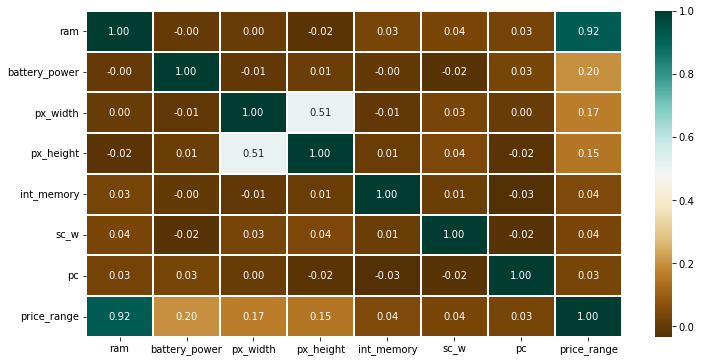

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(dfFilter1.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [23]:
y = dfFilter1['price_range']
X = dfFilter1.drop('price_range',axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)

In [25]:
#Escalar los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

In [26]:
#Libreria para el proceso de maquina de soporte vectorial
from sklearn.svm import SVC
modelo = SVC(C=2.0,kernel='linear',gamma='scale',random_state=0).fit(X_train,y_train)
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelo, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.50 %
Standard Deviation: 1.74 %


In [28]:
""""#sacamos la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
np.set_printoptions(precision=2)

title_options = [
    ("Matriz de confusión sin normalizar", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        modelo,
        X_test,
        y_test,
        display_labels=dfFilter1[['price_range']],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)

plot.show()"""

'"#sacamos la matriz de confusión\nfrom sklearn.metrics import ConfusionMatrixDisplay,classification_report\nnp.set_printoptions(precision=2)\n\ntitle_options = [\n    ("Matriz de confusión sin normalizar", None),\n    ("Matriz de confusión normalizada", "true"),\n]\nfor title, normalize in title_options:\n    display = ConfusionMatrixDisplay.from_estimator(\n        modelo,\n        X_test,\n        y_test,\n        display_labels=dfFilter1[[\'price_range\']],\n        cmap=plt.cm.Blues,\n        normalize=normalize,\n    )\n    display.ax_.set_title(title)\n\n    print(title)\n    print(display.confusion_matrix)\n\nplot.show()'

In [29]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,modelo.predict(X_test))
print(cm)

[[99  1  0  0]
 [ 2 94  4  0]
 [ 0  2 96  2]
 [ 0  0  3 97]]


In [30]:
#reporte de clasificasion
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.97      0.94      0.95       100
           2       0.93      0.96      0.95       100
           3       0.98      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.97       400
weighted avg       0.97      0.96      0.97       400



C:\Users\jcarl\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


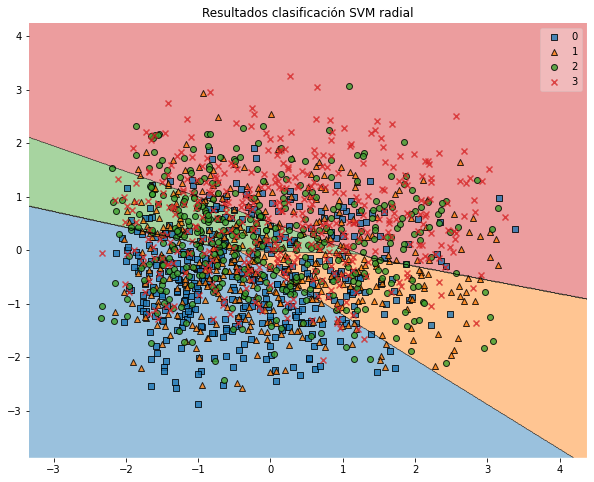

In [31]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
modelo.fit(X_train2, y_train)

fig, ax = plt.subplots(figsize=(10,8))
plot_decision_regions(
    X = X_train2,
    y = y_train.values.flatten(),
    clf = modelo,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial");